# Notebook

### This notebook contains the best Machine Learning algorithm that can predict whether a server will be hacked or not.

#### Importing basic modules in python for data representatio and analysis.

In [1]:
import pandas as pd
import numpy as np

#### Reading the data to train the ML models.

In [2]:
df=pd.read_csv('~/Desktop/threat/Train.csv')
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


#### Reading the data to test the ML models.

In [3]:
df_test=pd.read_csv('~/Desktop/threat/Test.csv')
df_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


#### Cleaning of data.

In [4]:
df['DATE']=pd.to_datetime(df['DATE'])

In [5]:
df=df.fillna(df.median())

In [6]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [7]:
df_test['X_12'].value_counts()

1.0     10530
0.0      3346
2.0      1381
3.0       321
4.0       100
5.0        42
6.0        23
7.0        10
8.0         9
10.0        4
9.0         3
11.0        2
20.0        1
40.0        1
14.0        1
12.0        1
18.0        1
Name: X_12, dtype: int64

In [8]:
df_test=df_test.fillna(df_test.median())

#### Exploratory Data Analysis or EDA.

In [9]:
success=df['DATE'].dt.year.where(df['MULTIPLE_OFFENSE']==1).value_counts()
attempts=df['DATE'].dt.year.value_counts()
rate=pd.DataFrame(dtype='int64')
k=[]
for i,j in zip(success,attempts):
    k.append((i/j)*100)
rate['Year']=success.index 
rate['Attempts']=np.array(attempts)
rate['Success']=np.array(success)
rate['Success_rate']=k
rate.head()

,Year,Attempts,Success,Success_rate
0,2001.0,1186,1138,95.952782
1,1996.0,1040,974,93.653846
2,2000.0,1016,974,95.866142
3,2006.0,989,936,94.641052
4,1993.0,962,932,96.881497


In [10]:
rate.describe()

,Year,Attempts,Success,Success_rate
count,28.000000,28.000000,28.000000,28.000000
mean,2004.500000,852.000000,813.857143,95.583241
std,8.225975,133.092004,124.629143,1.003606
min,1991.000000,512.000000,497.000000,93.653846
25%,1997.750000,771.750000,730.250000,94.754843
50%,2004.500000,854.500000,822.500000,95.555506
75%,2011.250000,942.500000,892.750000,96.185543
max,2018.000000,1186.000000,1138.000000,97.348485


Maximum success in hacking was on 2018 with a percentage of 97.3485.
Minimum success in hacking was on 1991 with a percentage of 93.6538.

The mean success in hacking is 95.5832%.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

### Graph showing trends of success rates on each year.

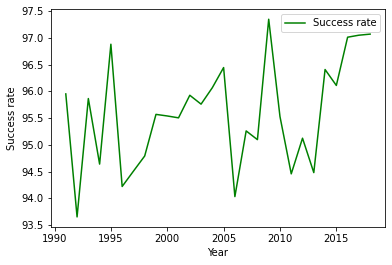

In [12]:
plt.plot(range(1991,2019),rate.Success_rate,'g')
plt.legend(('Success rate', '+/- 3xstd'))
plt.ylabel('Success rate')
plt.xlabel('Year')
plt.show()

There are some sudden increase during the 1995,2001,2009,2018...etc

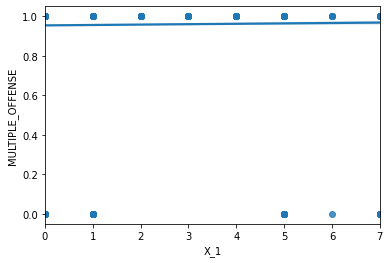

In [13]:
sns.regplot(df['X_1'],df['MULTIPLE_OFFENSE'])

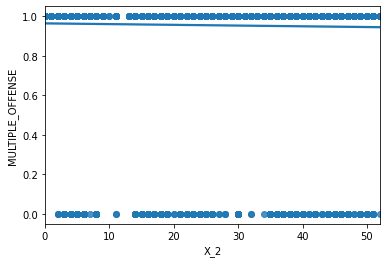

In [14]:
sns.regplot(df['X_2'],df['MULTIPLE_OFFENSE'])

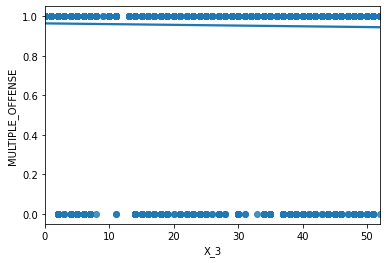

In [15]:
sns.regplot(df['X_3'],df['MULTIPLE_OFFENSE'])

From the above plots it is clearly understood that we cannot precisely divide the given input datasets regarding the output variable.

### Applying ML algorithms.

From the question and the structure of the data set, it is understood that the problem is a classification type. I applied 5 classification algorithm here and found the best one according to my calculations.

## Splitting the data.

In [16]:
X=df[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']]
X.shape

(23856, 15)

In [17]:
Y=df['MULTIPLE_OFFENSE']
Y.shape

(23856,)

### KNN algorithm.

In [18]:
from  sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn import metrics

In [20]:
k=2
model_1=KNeighborsClassifier(n_neighbors =k,leaf_size=2,algorithm='auto').fit(X,Y)
model_1

KNeighborsClassifier(leaf_size=2, n_neighbors=2)

#### Accuracy scores.

In [21]:
metrics.accuracy_score(Y,model_1.predict(X))

0.9915744466800804

In [22]:
metrics.f1_score(Y,model_1.predict(X))

0.9955702479338844

In [23]:
test_1=model_1.predict(df_test[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']])

In [24]:
test_1

array([1, 1, 1, ..., 1, 1, 1])

#### Storing predictions of KNN as csv file.

In [25]:
csv_1=pd.DataFrame(columns=['INCIDENT_ID','MULTIPLE_OFFENSE'])
csv_1['INCIDENT_ID']=df_test['INCIDENT_ID']
csv_1['MULTIPLE_OFFENSE']=test_1
csv_1=csv_1.set_index('INCIDENT_ID')
csv_1.to_csv('~/Desktop/threat/answer.csv')

### DecisionTree.

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
model_2=DecisionTreeClassifier(criterion='entropy',max_depth=11).fit(X,Y)

#### Accuracy scores.

In [72]:
metrics.accuracy_score(Y,model_2.predict(X))

1.0

In [73]:
metrics.f1_score(Y,model_2.predict(X))

1.0

In [74]:
test_2=model_2.predict(df_test[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']])

In [75]:
test_2

array([1, 1, 1, ..., 1, 1, 1])

#### Storing Decision tree prediction as csv.

In [76]:
csv_2=pd.DataFrame(columns=['INCIDENT_ID','MULTIPLE_OFFENSE'])
csv_2['INCIDENT_ID']=df_test['INCIDENT_ID']
csv_2['MULTIPLE_OFFENSE']=test_2
csv_2=csv_2.set_index('INCIDENT_ID')
csv_2.to_csv('~/Desktop/threat/answer2.csv')

### Logistic Regression.

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model_3=LogisticRegression(C=0.001,solver='liblinear').fit(X,Y)

#### Accuracy scores.

In [35]:
metrics.accuracy_score(Y,model_3.predict(X))

0.954686452045607

In [36]:
metrics.f1_score(Y,model_3.predict(X))

0.9768020772977961

In [37]:
test_3=model_3.predict(df_test[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']])

In [38]:
test_3

array([1, 1, 1, ..., 1, 1, 1])

#### Storing  prediction LogisticRegression as csv.

In [39]:
csv_3=pd.DataFrame(columns=['INCIDENT_ID','MULTIPLE_OFFENSE'])
csv_3['INCIDENT_ID']=df_test['INCIDENT_ID']
csv_3['MULTIPLE_OFFENSE']=test_3
csv_3=csv_3.set_index('INCIDENT_ID')
csv_3.to_csv('~/Desktop/threat/answer3.csv')

### Support Vector Machine.

In [40]:
from sklearn import svm

In [41]:
model_4=svm.SVC(kernel='rbf')

In [42]:
model_4.fit(X,Y)

SVC()

#### Accuracy scores.

In [43]:
metrics.accuracy_score(Y,model_4.predict(X))

0.9552313883299799

In [44]:
metrics.f1_score(Y,model_4.predict(X))

0.9771031643941342

In [45]:
test_4=model_4.predict(df_test[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']])

In [46]:
test_4

array([1, 1, 1, ..., 1, 1, 1])

#### Storing  prediction of  Support Vector Machine as csv.

In [47]:
csv_4=pd.DataFrame(columns=['INCIDENT_ID','MULTIPLE_OFFENSE'])
csv_4['INCIDENT_ID']=df_test['INCIDENT_ID']
csv_4['MULTIPLE_OFFENSE']=test_4
csv_4=csv_4.set_index('INCIDENT_ID')
csv_4.to_csv('~/Desktop/threat/answer4.csv')

### Random Forest Classifier.

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model_5=RandomForestClassifier(random_state=88)


In [50]:
model_5.fit(X,Y)

RandomForestClassifier(random_state=88)

#### Accuracy scores.

In [51]:
metrics.accuracy_score(Y,model_5.predict(X))

1.0

In [52]:
metrics.f1_score(Y,model_5.predict(X))

1.0

In [53]:
test_5=model_5.predict(df_test[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']])

#### Storing Random Forest Classifier prediction as csv.

In [54]:
csv_5=pd.DataFrame(columns=['INCIDENT_ID','MULTIPLE_OFFENSE'])
csv_5['INCIDENT_ID']=df_test['INCIDENT_ID']
csv_5['MULTIPLE_OFFENSE']=test_5
csv_5=csv_5.set_index('INCIDENT_ID')
csv_5.to_csv('~/Desktop/threat/answer5.csv')

------------------------------------------------------------------------------------------------------------------

## Conclusion

###### From analysing the dataset and predicting the output using different classification algorithm, I found out that Decision Tree is the best ML algorithm that can be applied to this problem.

#### Best Algorithm :- Decision Tree Classifier